# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set()

# Data

In [2]:
data = pd.read_csv('2020_Real_Estate_Transaction_Data.csv')

In [3]:
data.head(3)

transaction date          district      transaction type  \
0       2020-01-02   Beitou District  Land+Building+Garage   
1       2020-01-02   Datong District         Land+Building   
2       2020-01-02  Wenshan District  Land+Building+Garage   

   land shifting total area  num_building  num_land  num_garage  \
0                     21.16             2         2           1   
1                     12.00             1         1           0   
2                     35.61             1         1           1   

   total floor number               building state main building materials  \
0                 7.0        Apartment_5to10storey     Reinforced Concrete   
1                 2.0                        House                     NaN   
2                14.0  Apartment_11storeyorgreater     Reinforced Concrete   

   ...  management org  carpark type  carpark shifting area  \
0  ...               1    Ramp Plane                    0.0   
1  ...               0    No carpark                    0.0   
2  ...               1    Ramp Plane                    0.0   

   carpark total price  main building area  subsidiary building area  \
0                    0               95.88                       0.0   
1                    0               17.46                       0.0   
2                    0               96.26                       0.0   

  balcony area  elevator  total ntd  unit ntd  
0         7.94         1   10000000   85587.0  
1         0.00         0    2553800  146266.0  
2        11.11         1   24500000  135975.0  

[3 rows x 25 columns]

In [4]:
data.shape

(22740, 25)

In [5]:
data.groupby('district')['district'].agg('count')

district
Beitou District        2165
Daan District          2029
Datong District        1064
Nangang District       1013
Neihu District         2938
Shilin District        1791
Songshan District      1511
Wanhua District        1546
Wenshan District       2324
Xinyi District         1639
ZhongZheng District    1376
Zhongshan District     3344
Name: district, dtype: int64

In [6]:
data.loc[data['total ntd'] == 0]

transaction date         district transaction type  \
7278       2020-06-01  Shilin District    Land+Building   

      land shifting total area  num_building  num_land  num_garage  \
7278                     16.67             1         1           0   

      total floor number building state main building materials  ...  \
7278                12.0     Storefront     Reinforced Concrete  ...   

      management org  carpark type  carpark shifting area  \
7278               1    No carpark                    0.0   

      carpark total price  main building area  subsidiary building area  \
7278                    0                 0.0                       0.0   

     balcony area  elevator  total ntd  unit ntd  
7278          0.0         0          0       0.0  

[1 rows x 25 columns]

# Data Exploratory

In [3]:
data = data.drop(['transaction date', 'transaction type', 'building shifting total area'], axis=1)

In [87]:
data.head()

district  land shifting total area  num_building  num_land  \
0     Beitou District                     21.16             2         2   
1     Datong District                     12.00             1         1   
2    Wenshan District                     35.61             1         1   
3  Zhongshan District                      9.50             1         1   
4      Xinyi District                      1.80             1         1   

   num_garage  total floor number               building state  \
0           1                 7.0        Apartment_5to10storey   
1           0                 2.0                        House   
2           1                14.0  Apartment_11storeyorgreater   
3           0                 4.0            Apartment_5storey   
4           0                 7.0        Apartment_5to10storey   

  main building materials  complete year  num_room  ...  management org  \
0     Reinforced Concrete           69.0         3  ...               1   
1                     NaN           33.0         0  ...               0   
2     Reinforced Concrete           99.0         3  ...               1   
3  Strengthened Brickwork           56.0         1  ...               0   
4     Reinforced Concrete            NaN         2  ...               0   

   carpark type carpark shifting area  carpark total price  \
0    Ramp Plane                   0.0                    0   
1    No carpark                   0.0                    0   
2    Ramp Plane                   0.0                    0   
3    No carpark                   0.0                    0   
4    No carpark                   0.0                    0   

   main building area  subsidiary building area  balcony area  elevator  \
0               95.88                      0.00          7.94         1   
1               17.46                      0.00          0.00         0   
2               96.26                      0.00         11.11         1   
3               20.01                      3.36          0.00         0   
4                5.98                      0.10          0.56         1   

   total ntd  unit ntd  
0   10000000   85587.0  
1    2553800  146266.0  
2   24500000  135975.0  
3    2300000   98375.0  
4    2200000  139505.0  

[5 rows x 21 columns]

In [4]:
data = data.drop(['carpark shifting area'], axis=1)

<AxesSubplot:>

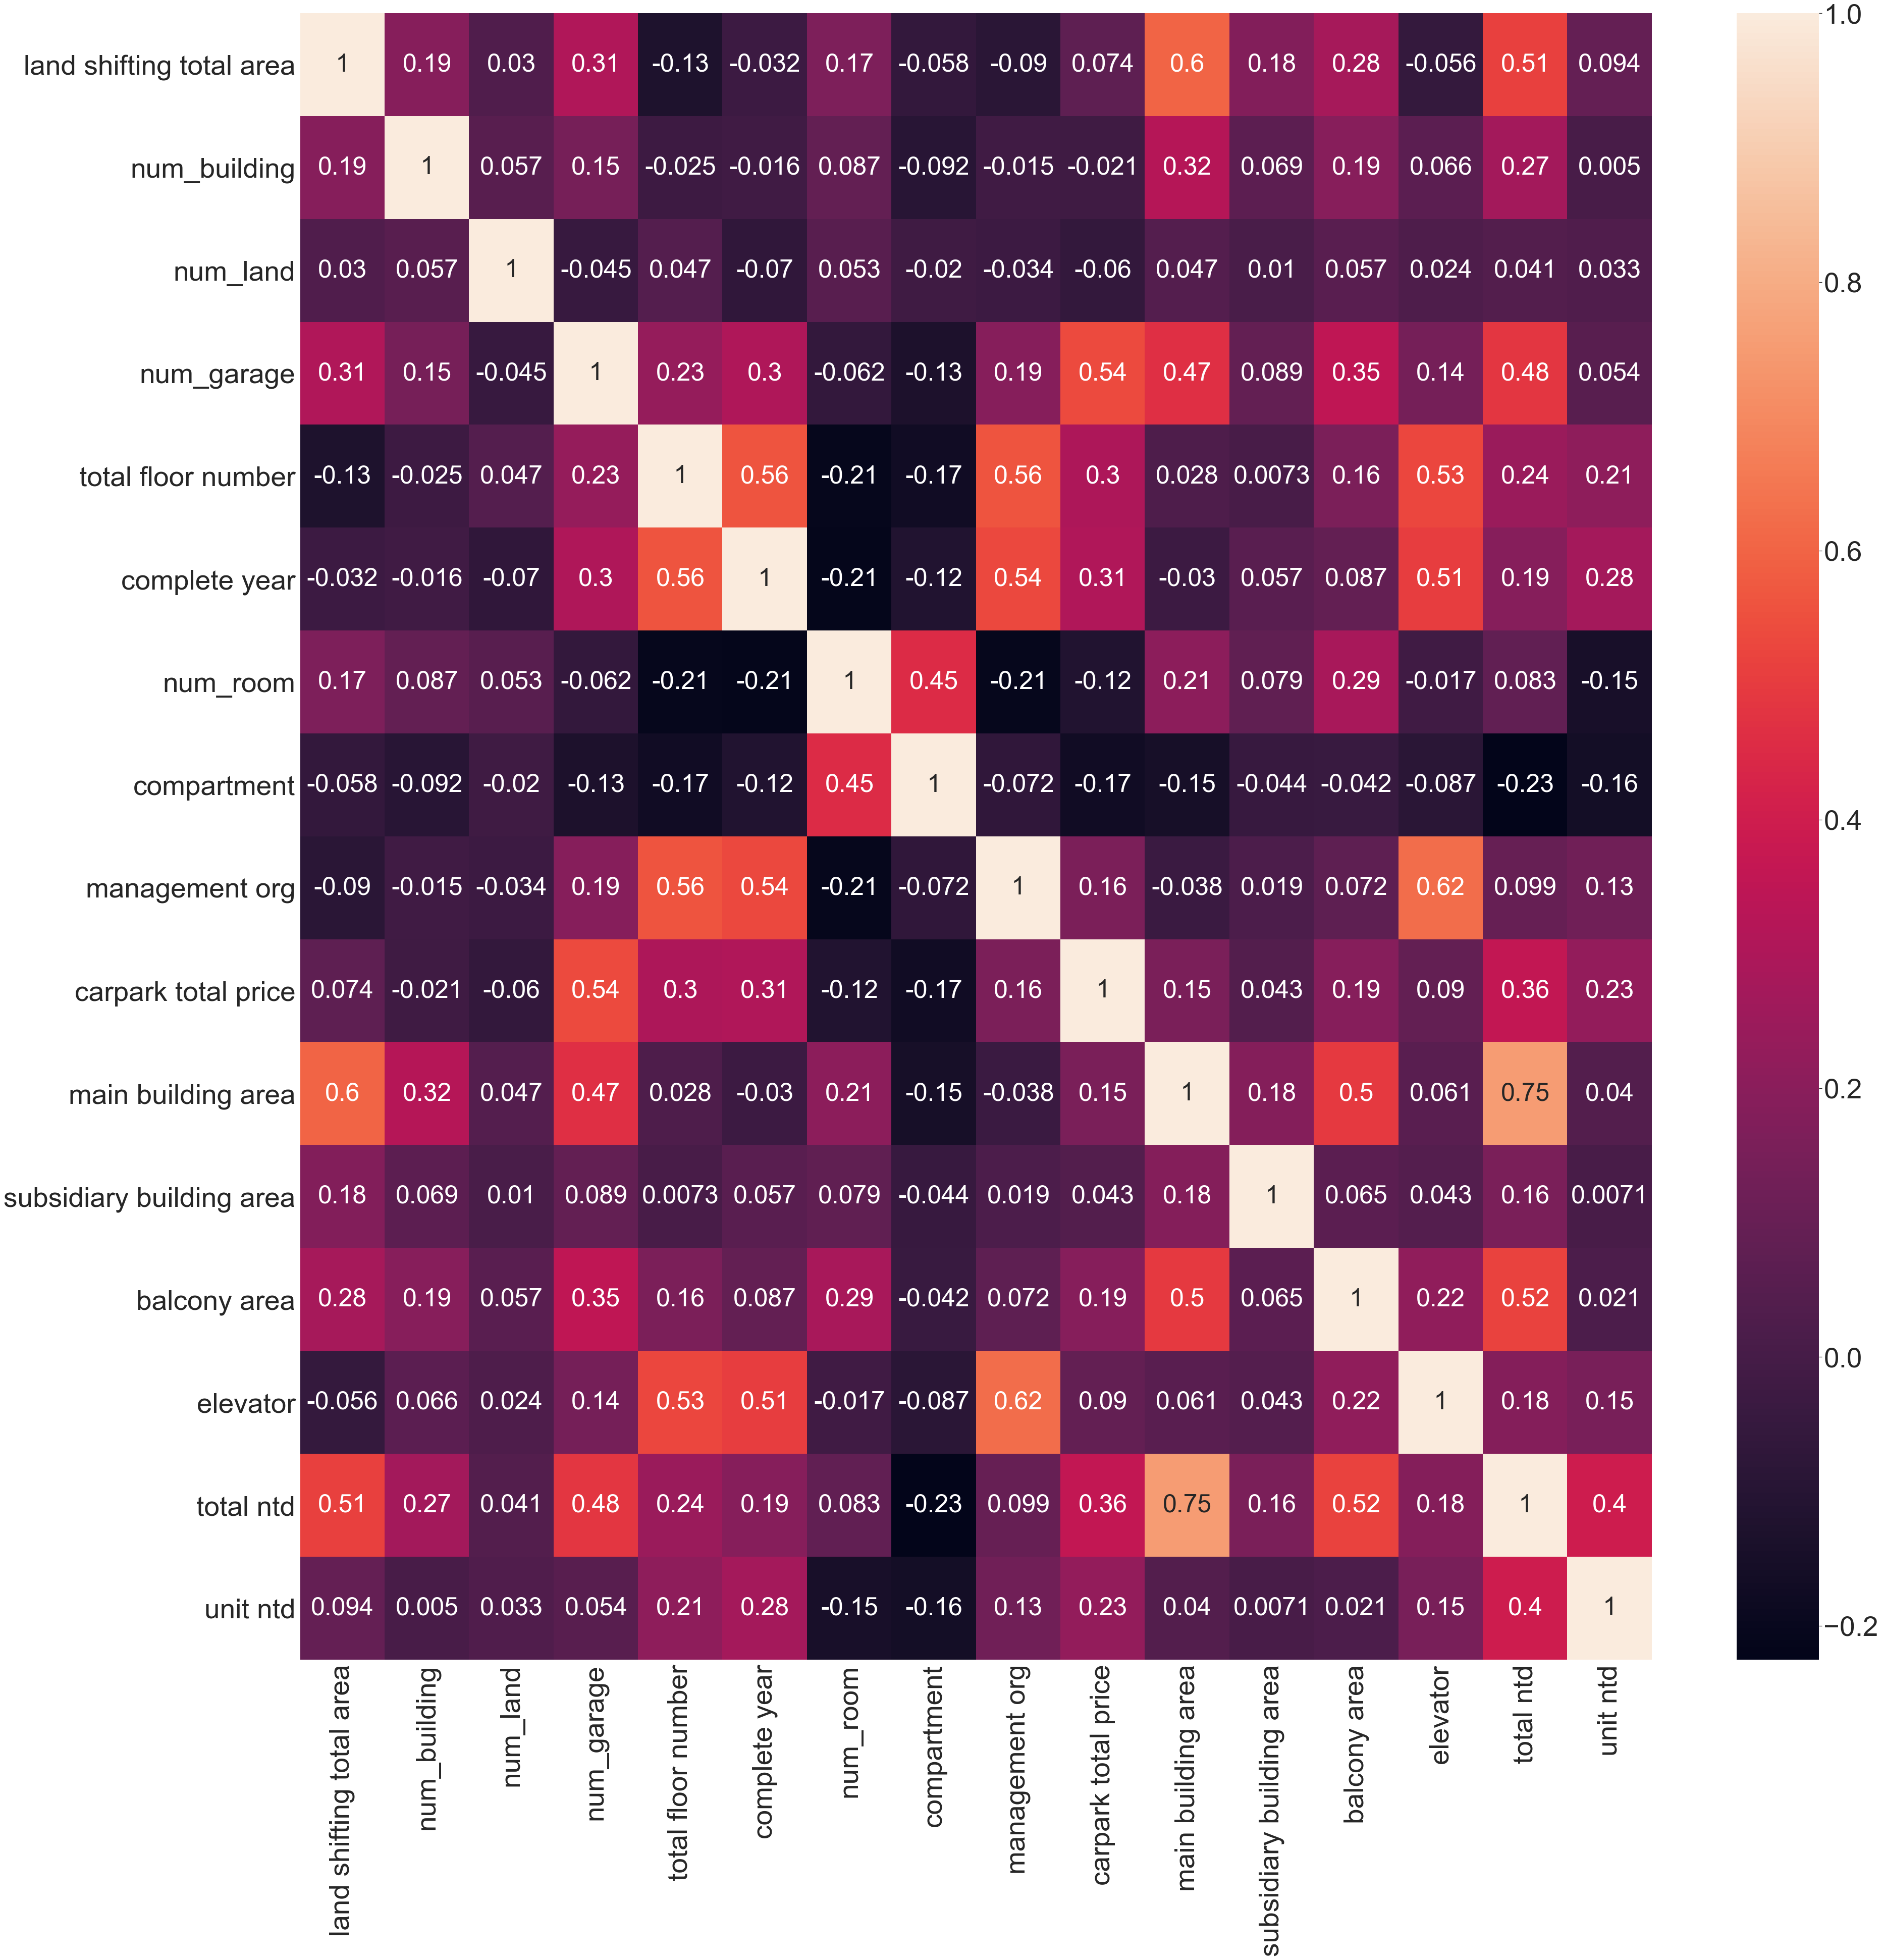

In [9]:
sns.set(font_scale=5)
plt.figure(figsize=(60,60))
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":50})

In [12]:
data['total ntd'].describe()

count    2.274000e+04
mean     2.513040e+07
std      3.947179e+07
min      0.000000e+00
25%      1.016000e+07
50%      1.682500e+07
75%      2.800000e+07
max      1.750000e+09
Name: total ntd, dtype: float64

C:\Users\B00330\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total ntd', ylabel='Density'>

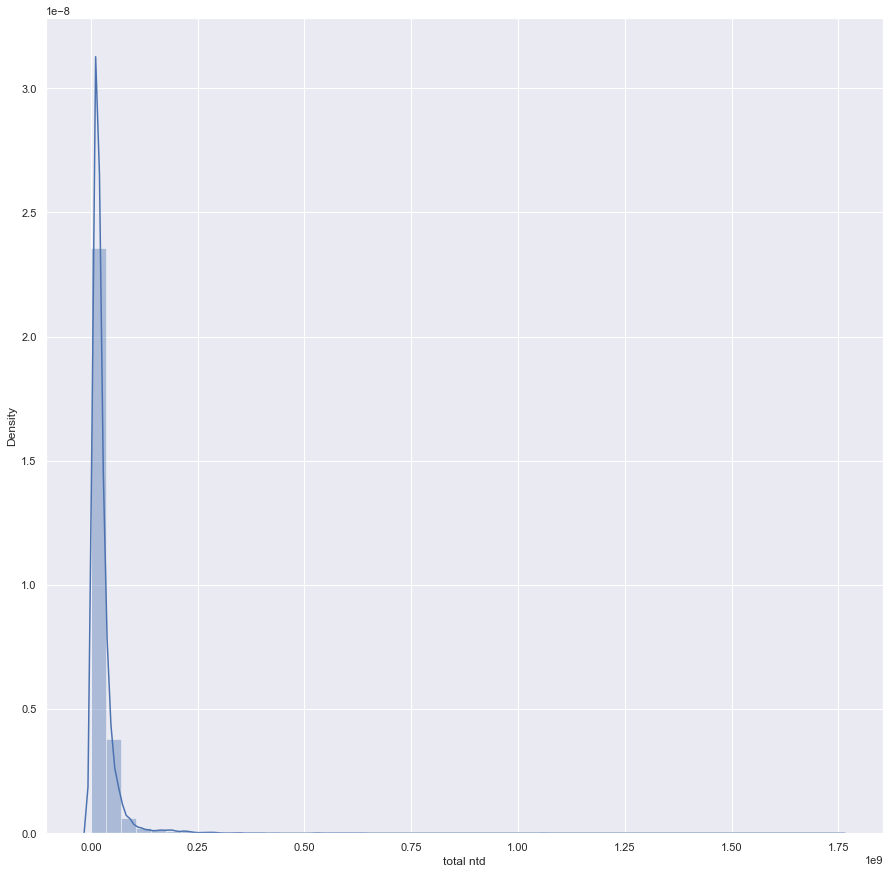

In [13]:
sns.set()
plt.figure(figsize=(15,15))
sns.distplot(data['total ntd'])

## Missing Value

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
#total

In [6]:
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
#percent

In [7]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [90]:
missing_data.head(7)

Total   Percent
complete year             2037  0.089578
unit ntd                  1239  0.054485
main building materials    335  0.014732
total floor number         333  0.014644
building state              84  0.003694
carpark type                 0  0.000000
total ntd                    0  0.000000

In [8]:
data['total floor number'].fillna(data['total floor number'].describe()['50%'], inplace=True)
data['complete year'].fillna(data['complete year'].describe()['50%'], inplace=True)
data['unit ntd'].fillna(data['unit ntd'].describe()['50%'], inplace=True)

data = data.drop(['main building materials', 'building state'], axis=1)

In [13]:
data.isnull().sum()

district                    0
land shifting total area    0
num_building                0
num_land                    0
num_garage                  0
total floor number          0
complete year               0
num_room                    0
num_bathroom                0
compartment                 0
management org              0
carpark type                0
carpark total price         0
main building area          0
subsidiary building area    0
balcony area                0
elevator                    0
total ntd                   0
unit ntd                    0
dtype: int64

<AxesSubplot:>

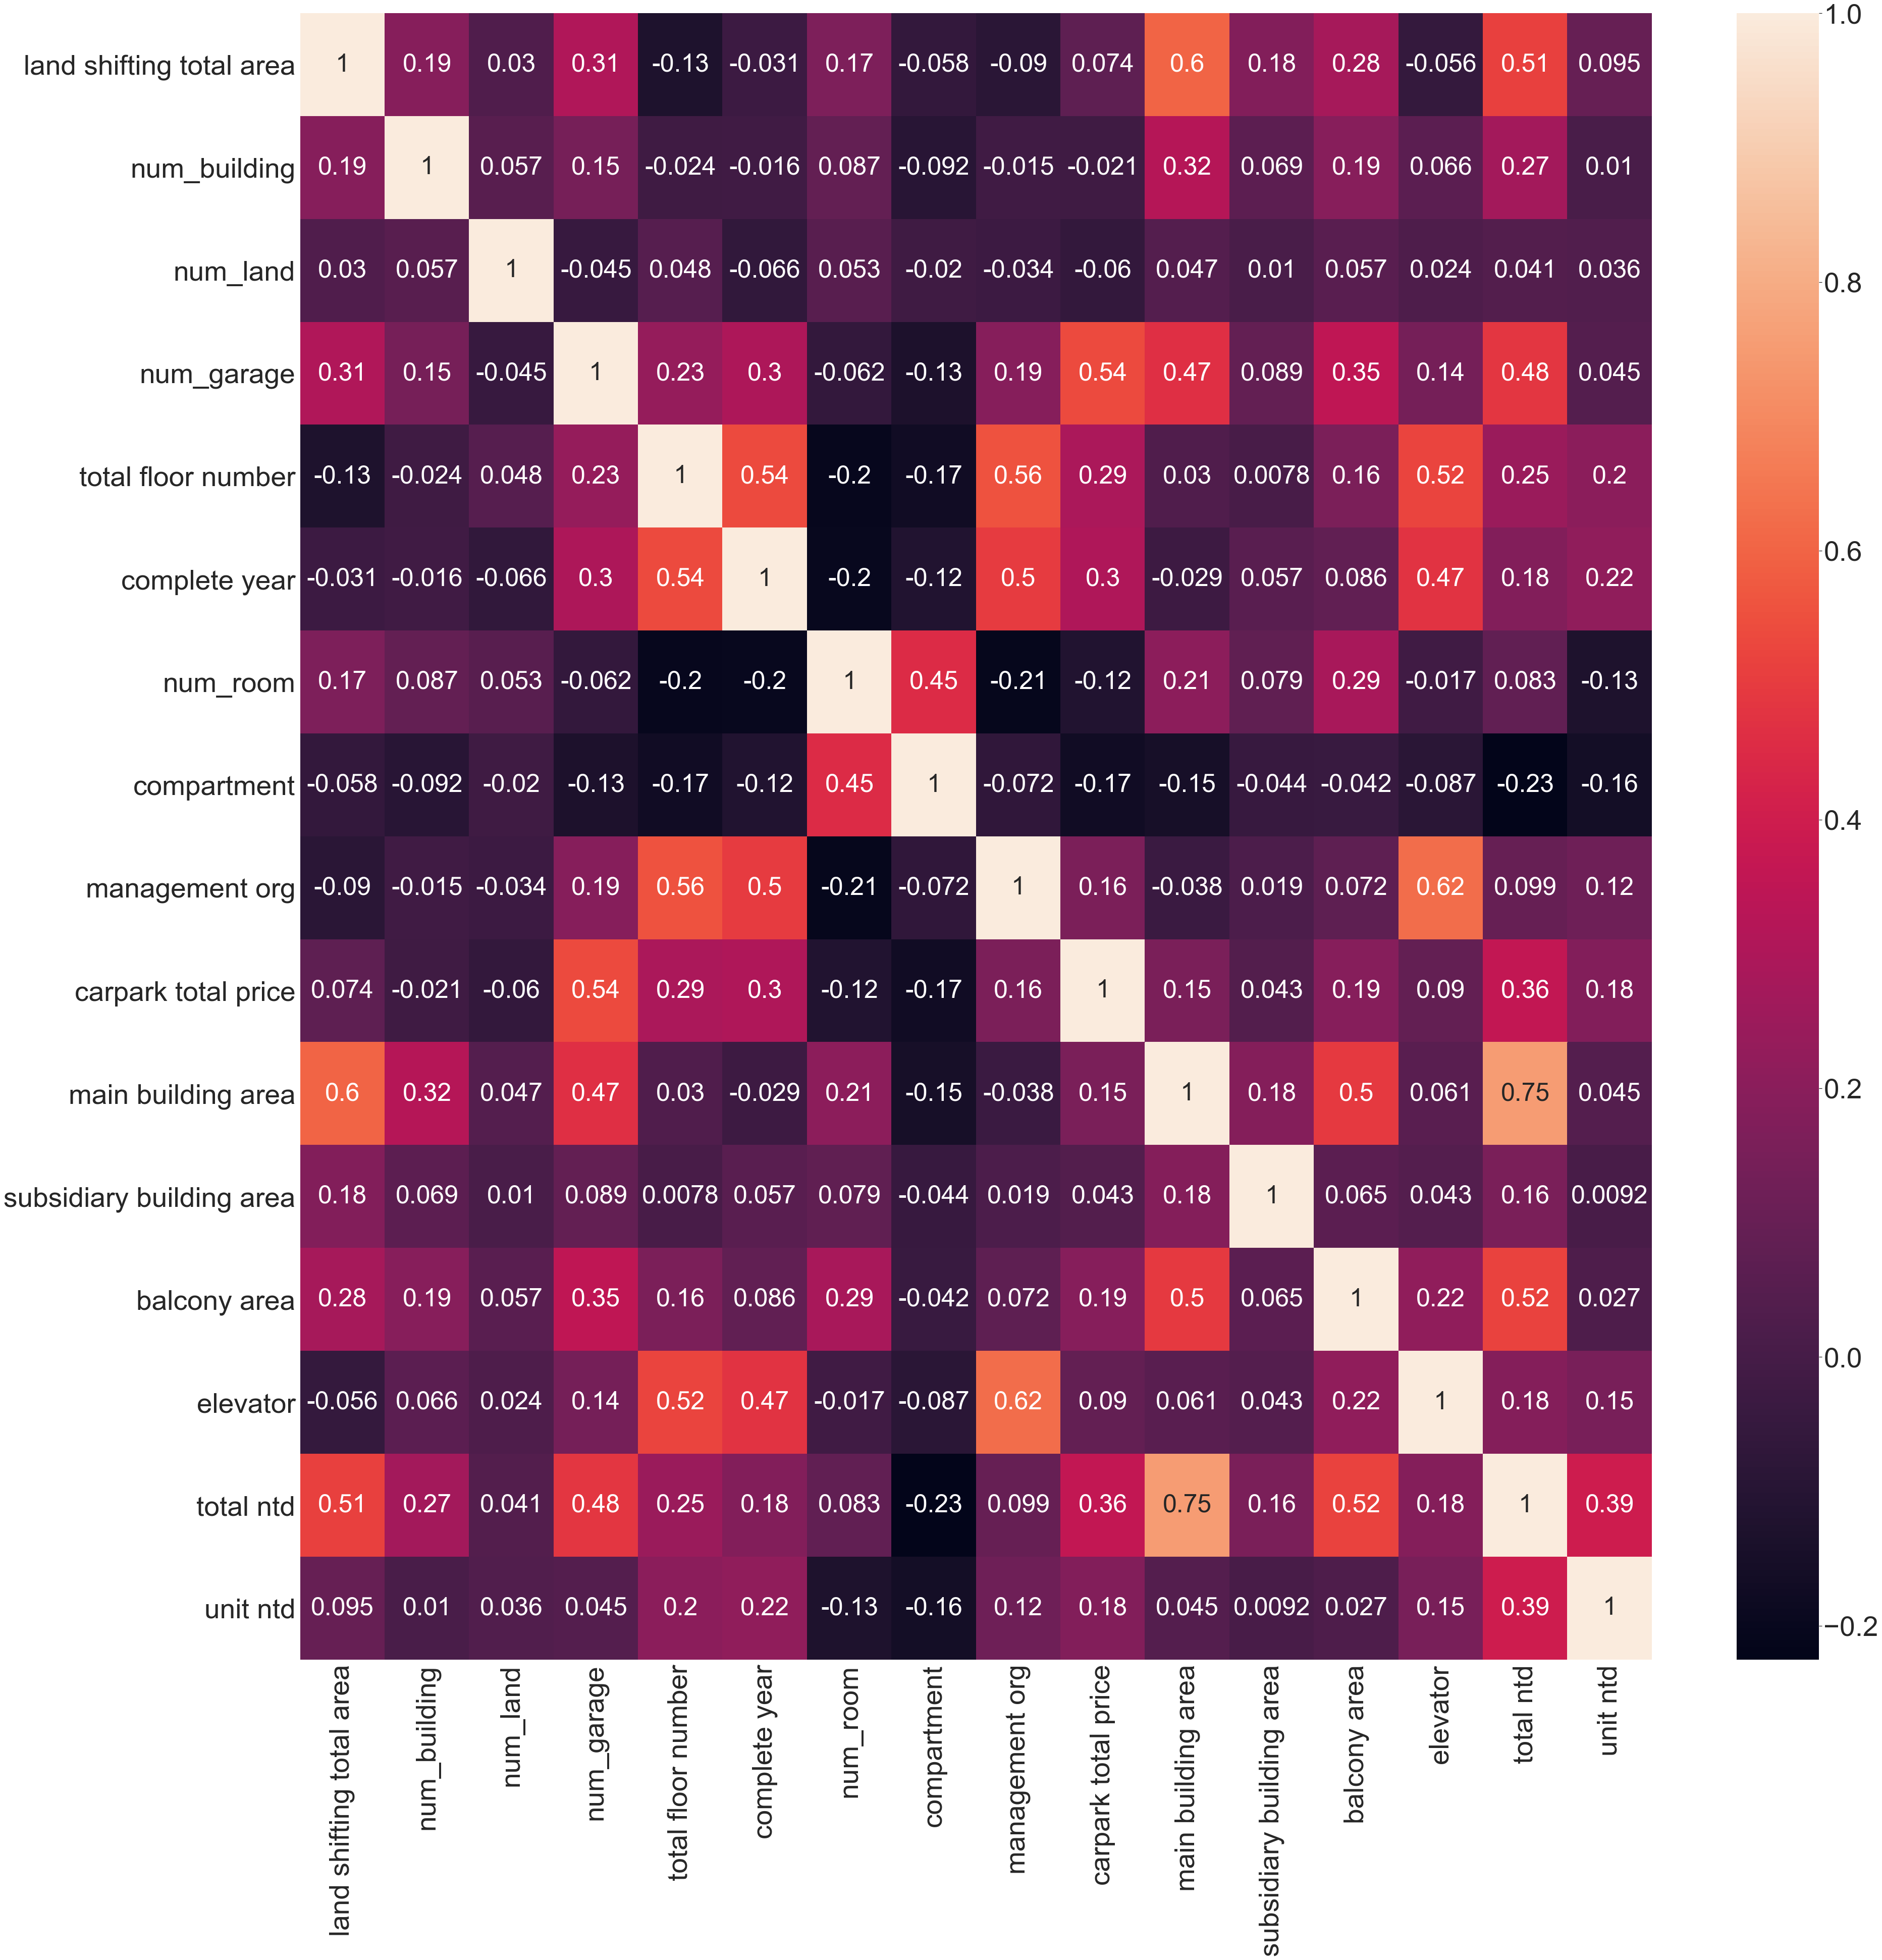

In [60]:
sns.set(font_scale=5)
plt.figure(figsize=(60,60))
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":50})

# Feature engineering

## Check each variables to see if any value is repeated

In [17]:
data.columns

Index(['district', 'land shifting total area', 'num_building', 'num_land',
       'num_garage', 'total floor number', 'complete year', 'num_room',
       'compartment', 'management org', 'carpark type', 'carpark total price',
       'main building area', 'subsidiary building area', 'balcony area',
       'elevator', 'total ntd', 'unit ntd'],
      dtype='object')

In [34]:
var = 'subsidiary building area'
data[var].unique()

array([0.0000e+00, 3.3600e+00, 1.0000e-01, ..., 4.5210e+01, 1.7758e+02,
       2.2520e+01])

In [9]:
data['carpark type'] = data['carpark type'].replace('Ramp Plane', 'Lifting Plane')
data['carpark type'] = data['carpark type'].replace('Ramp Machinery', 'Lifting Machinery')

## Check irregular data

### num building stat

In [10]:
num_building_stat = data['num_building'].value_counts().sort_values(ascending=False)
#num_building_stat

In [95]:
len(num_building_stat[num_building_stat <= 10])

10

In [11]:
num_build_less_than_10 = num_building_stat[num_building_stat <= 10]
#num_build_less_than_10

In [12]:
data['num_building'] = data['num_building'].apply(lambda x: 5 if x in num_build_less_than_10 else x)

In [14]:
data['num_building'].unique()

array([2, 1, 0, 4, 3, 5], dtype=int64)

In [100]:
data['num_land'].value_counts()

1    16201
2     3918
3     1209
0      663
4      418
5      116
6       83
7       54
9       40
8       38
Name: num_land, dtype: int64

### num garage

In [14]:
num_garage_stat = data['num_garage'].value_counts()
#num_garage_stat

In [15]:
garage_less_than_20 = num_garage_stat[num_garage_stat <= 20]

In [16]:
data['num_garage'] = data['num_garage'].apply(lambda x: 7 if x in garage_less_than_20 else x)

In [22]:
data['num_garage'].unique()

array([1, 0, 3, 2, 5, 4, 6, 7], dtype=int64)

### total floor number

In [18]:
data['total floor number'].value_counts()

5.0     3616
4.0     2740
7.0     2657
12.0    2294
14.0    1723
11.0    1184
9.0     1150
15.0     984
13.0     965
10.0     922
8.0      641
6.0      637
19.0     435
18.0     417
2.0      355
16.0     319
3.0      306
17.0     296
24.0     250
27.0     142
23.0     118
21.0     111
26.0      95
1.0       65
22.0      62
20.0      60
29.0      59
25.0      44
42.0      23
38.0      19
30.0      14
31.0      14
28.0      13
33.0       9
35.0       1
Name: total floor number, dtype: int64

In [17]:
data['total floor number'] = data['total floor number'].replace(33.0, 34.0)
data['total floor number'] = data['total floor number'].replace(35.0, 34.0)

In [21]:
data['total floor number'].value_counts()

5.0     3616
4.0     2740
7.0     2657
12.0    2294
14.0    1723
11.0    1184
9.0     1150
15.0     984
13.0     965
10.0     922
8.0      641
6.0      637
19.0     435
18.0     417
2.0      355
16.0     319
3.0      306
17.0     296
24.0     250
27.0     142
23.0     118
21.0     111
26.0      95
1.0       65
22.0      62
20.0      60
29.0      59
25.0      44
42.0      23
38.0      19
30.0      14
31.0      14
28.0      13
34.0      10
Name: total floor number, dtype: int64

### complete year

In [18]:
complete_year_stat = data['complete year'].value_counts()
cys_less_than_10 = complete_year_stat[complete_year_stat <= 10]
#cys_less_than_10

In [19]:
data['complete year'] = data['complete year'].apply(lambda x: 53.0 if x in cys_less_than_10 else x)

In [22]:
data['complete year'].unique()

array([ 69.,  53.,  99.,  56.,  84.,  94.,  97.,  88.,  96.,  58., 103.,
        87.,  72.,  95.,  68.,  89.,  77.,  71.,  81., 104.,  92.,  66.,
        65.,  67.,  75.,  93.,  57.,  90.,  91.,  83., 108., 107.,  62.,
        70.,  61.,  64.,  74., 105.,  82.,  76.,  78.,  73., 102.,  60.,
        86.,  80., 101., 106.,  79.,  98.,  85.,  63., 100.,  55.,  54.,
        59., 109.])

### num room

In [20]:
num_room_stat = data['num_room'].value_counts()
num_room_less_than_10 = num_room_stat[num_room_stat <= 10]
num_room_less_than_10 

12    10
11     5
14     5
15     5
16     3
13     3
35     2
18     2
20     2
24     2
17     1
Name: num_room, dtype: int64

In [21]:
data['num_room'] = data['num_room'].apply(lambda x: 11 if x in num_room_less_than_10 else x)

In [22]:
data['num_room'].unique()

array([ 3,  0,  1,  2,  4,  5,  6,  9, 10, 11,  7,  8], dtype=int64)

## Outlier removal

In [23]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('district'):
        m = np.mean(subdf['unit ntd'])
        sd = np.std(subdf['unit ntd'])
        reduced_df = subdf[(subdf['unit ntd'] > (m-2*sd)) & (subdf['unit ntd'] <= (m+2*sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [24]:
data_updated = remove_outliers(data)

In [27]:
data_updated.shape

(22033, 19)

In [27]:
data['district'].unique()

array(['Beitou District', 'Datong District', 'Wenshan District',
       'Zhongshan District', 'Xinyi District', 'Nangang District',
       'Songshan District', 'Shilin District', 'Neihu District',
       'Wanhua District', 'ZhongZheng District', 'Daan District'],
      dtype=object)

In [28]:
def plot_scatter_chart(df, district, rn1, rn2):
    room1 = df[(df.district == district) & (df.num_room == rn1)]
    room2 = df[(df.district == district) & (df.num_room == rn2)]
    
    plt.figure(figsize = (15,10))
    plt.scatter(room1['main building area'], room1['total ntd'], label = '{} rooms'.format(rn1))
    plt.scatter(room2['main building area'], room2['total ntd'], marker='+', color='green', label = '{} rooms'.format(rn2))
    plt.xlabel('Main Building Area')
    plt.ylabel('Total Price')
    plt.title(district)
    plt.legend()

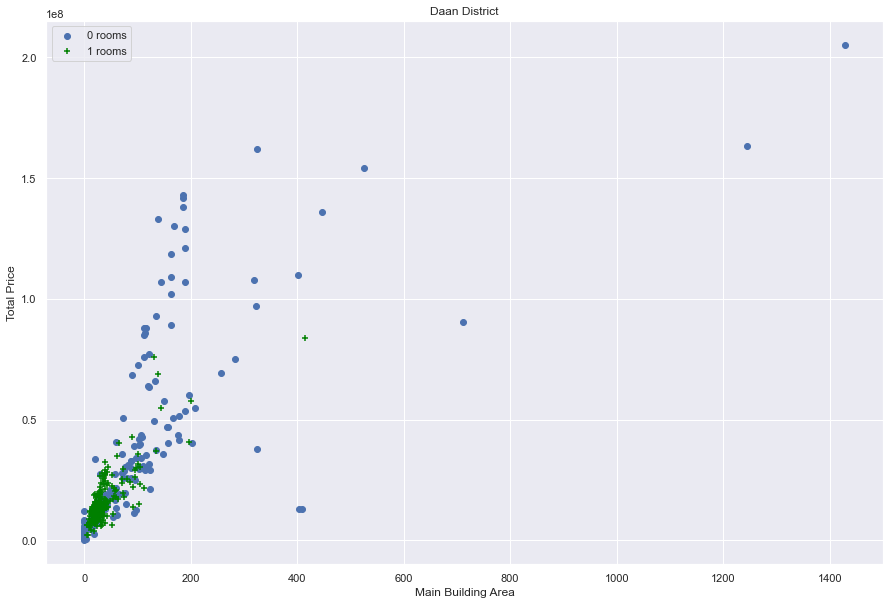

In [29]:
plot_scatter_chart(data_updated, 'Daan District', 0, 1)

In [90]:
data_updated.columns

Index(['district', 'land shifting total area', 'num_building', 'num_land',
       'num_garage', 'total floor number', 'complete year', 'num_room',
       'num_bathroom', 'compartment', 'management org', 'carpark type',
       'carpark total price', 'main building area', 'subsidiary building area',
       'balcony area', 'elevator', 'total ntd', 'unit ntd'],
      dtype='object')

(0.0, 900000.0)

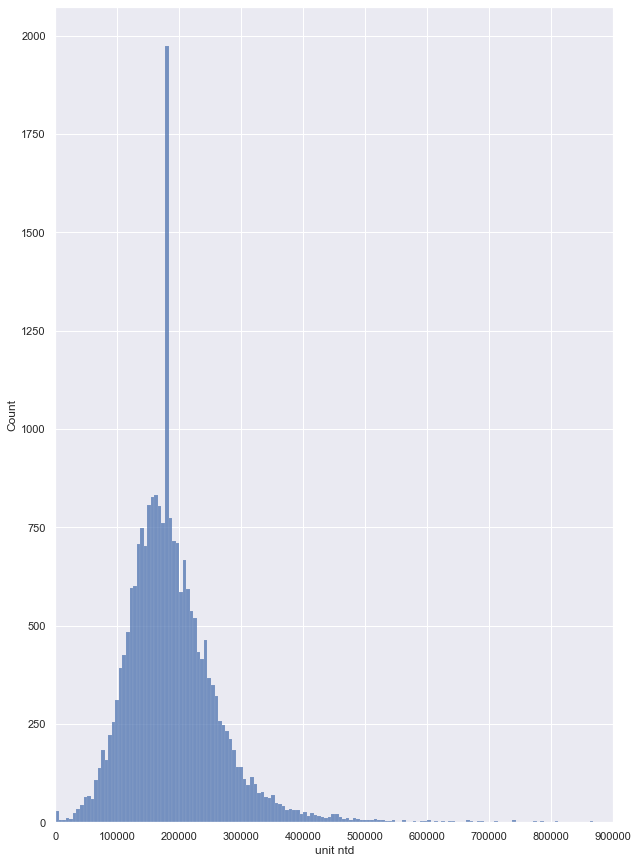

In [64]:
plt.figure(figsize=(10,15))
sns.histplot(data['unit ntd'])
plt.xlim(0, 0.9e6)

In [25]:
data_updated[data_updated.num_bathroom > data_updated.num_room + 2]

district  land shifting total area  num_building  num_land  \
841        Beitou District                     42.53             1         2   
1298       Beitou District                     74.23             1         1   
1303       Beitou District                     51.29             1         2   
1568       Beitou District                     51.29             1         2   
1825       Beitou District                     54.00             1         1   
1976       Beitou District                     42.80             1         2   
2000       Beitou District                     50.95             1         2   
2051       Beitou District                     27.84             1         3   
2386         Daan District                    120.39             1         1   
3806         Daan District                     38.09             1         1   
4974       Datong District                    109.17             5         1   
4975       Datong District                    115.70             5         1   
5314      Nangang District                     67.37             1         1   
5792      Nangang District                     25.61             1         2   
6325        Neihu District                      6.65             1         1   
8676        Neihu District                     53.45             1         3   
9107       Shilin District                     58.67             2         2   
9628       Shilin District                    953.00             1         2   
12459      Wanhua District                     94.00             1         2   
12613      Wanhua District                    129.00             1         1   
12614      Wanhua District                    129.00             1         1   
14072     Wenshan District                    218.09             1         1   
16174       Xinyi District                     62.48             5         4   
16900       Xinyi District                     65.34             1         1   
18019  ZhongZheng District                     97.00             4         1   
18208  ZhongZheng District                     25.50             1         1   
18279  ZhongZheng District                     38.58             2         3   
19346   Zhongshan District                    554.64             4         1   
19372   Zhongshan District                    172.82             3         1   
19373   Zhongshan District                     47.47             1         1   
20394   Zhongshan District                     13.17             1         1   
20765   Zhongshan District                     20.13             1         1   
20766   Zhongshan District                     20.13             1         1   
21477   Zhongshan District                     97.00             1         2   

       num_garage  total floor number  complete year  num_room  num_bathroom  \
841             2                21.0          108.0         0             3   
1298            2                 8.0          101.0         1             4   
1303            3                21.0          108.0         0             4   
1568            3                21.0          108.0         0             4   
1825            0                 9.0           53.0        11            15   
1976            2                21.0          108.0         0             3   
2000            3                21.0          108.0         0             4   
2051            0                 5.0           73.0         0             3   
2386            1                 7.0           82.0         0             4   
3806            2                14.0          106.0         0             3   
4974            0                 7.0           71.0        11            14   
4975            0                 7.0           71.0        11            18   
5314            1                 5.0           78.0         0             4   
5792            0                23.0          109.0         0             3   
6325            0

In [26]:
data_updated = data_updated[data_updated.num_bathroom < data_updated.num_room + 2]

In [27]:
data_updated.shape

(21910, 19)

In [28]:
data_updated = data_updated.drop('num_bathroom', axis=1)

<AxesSubplot:>

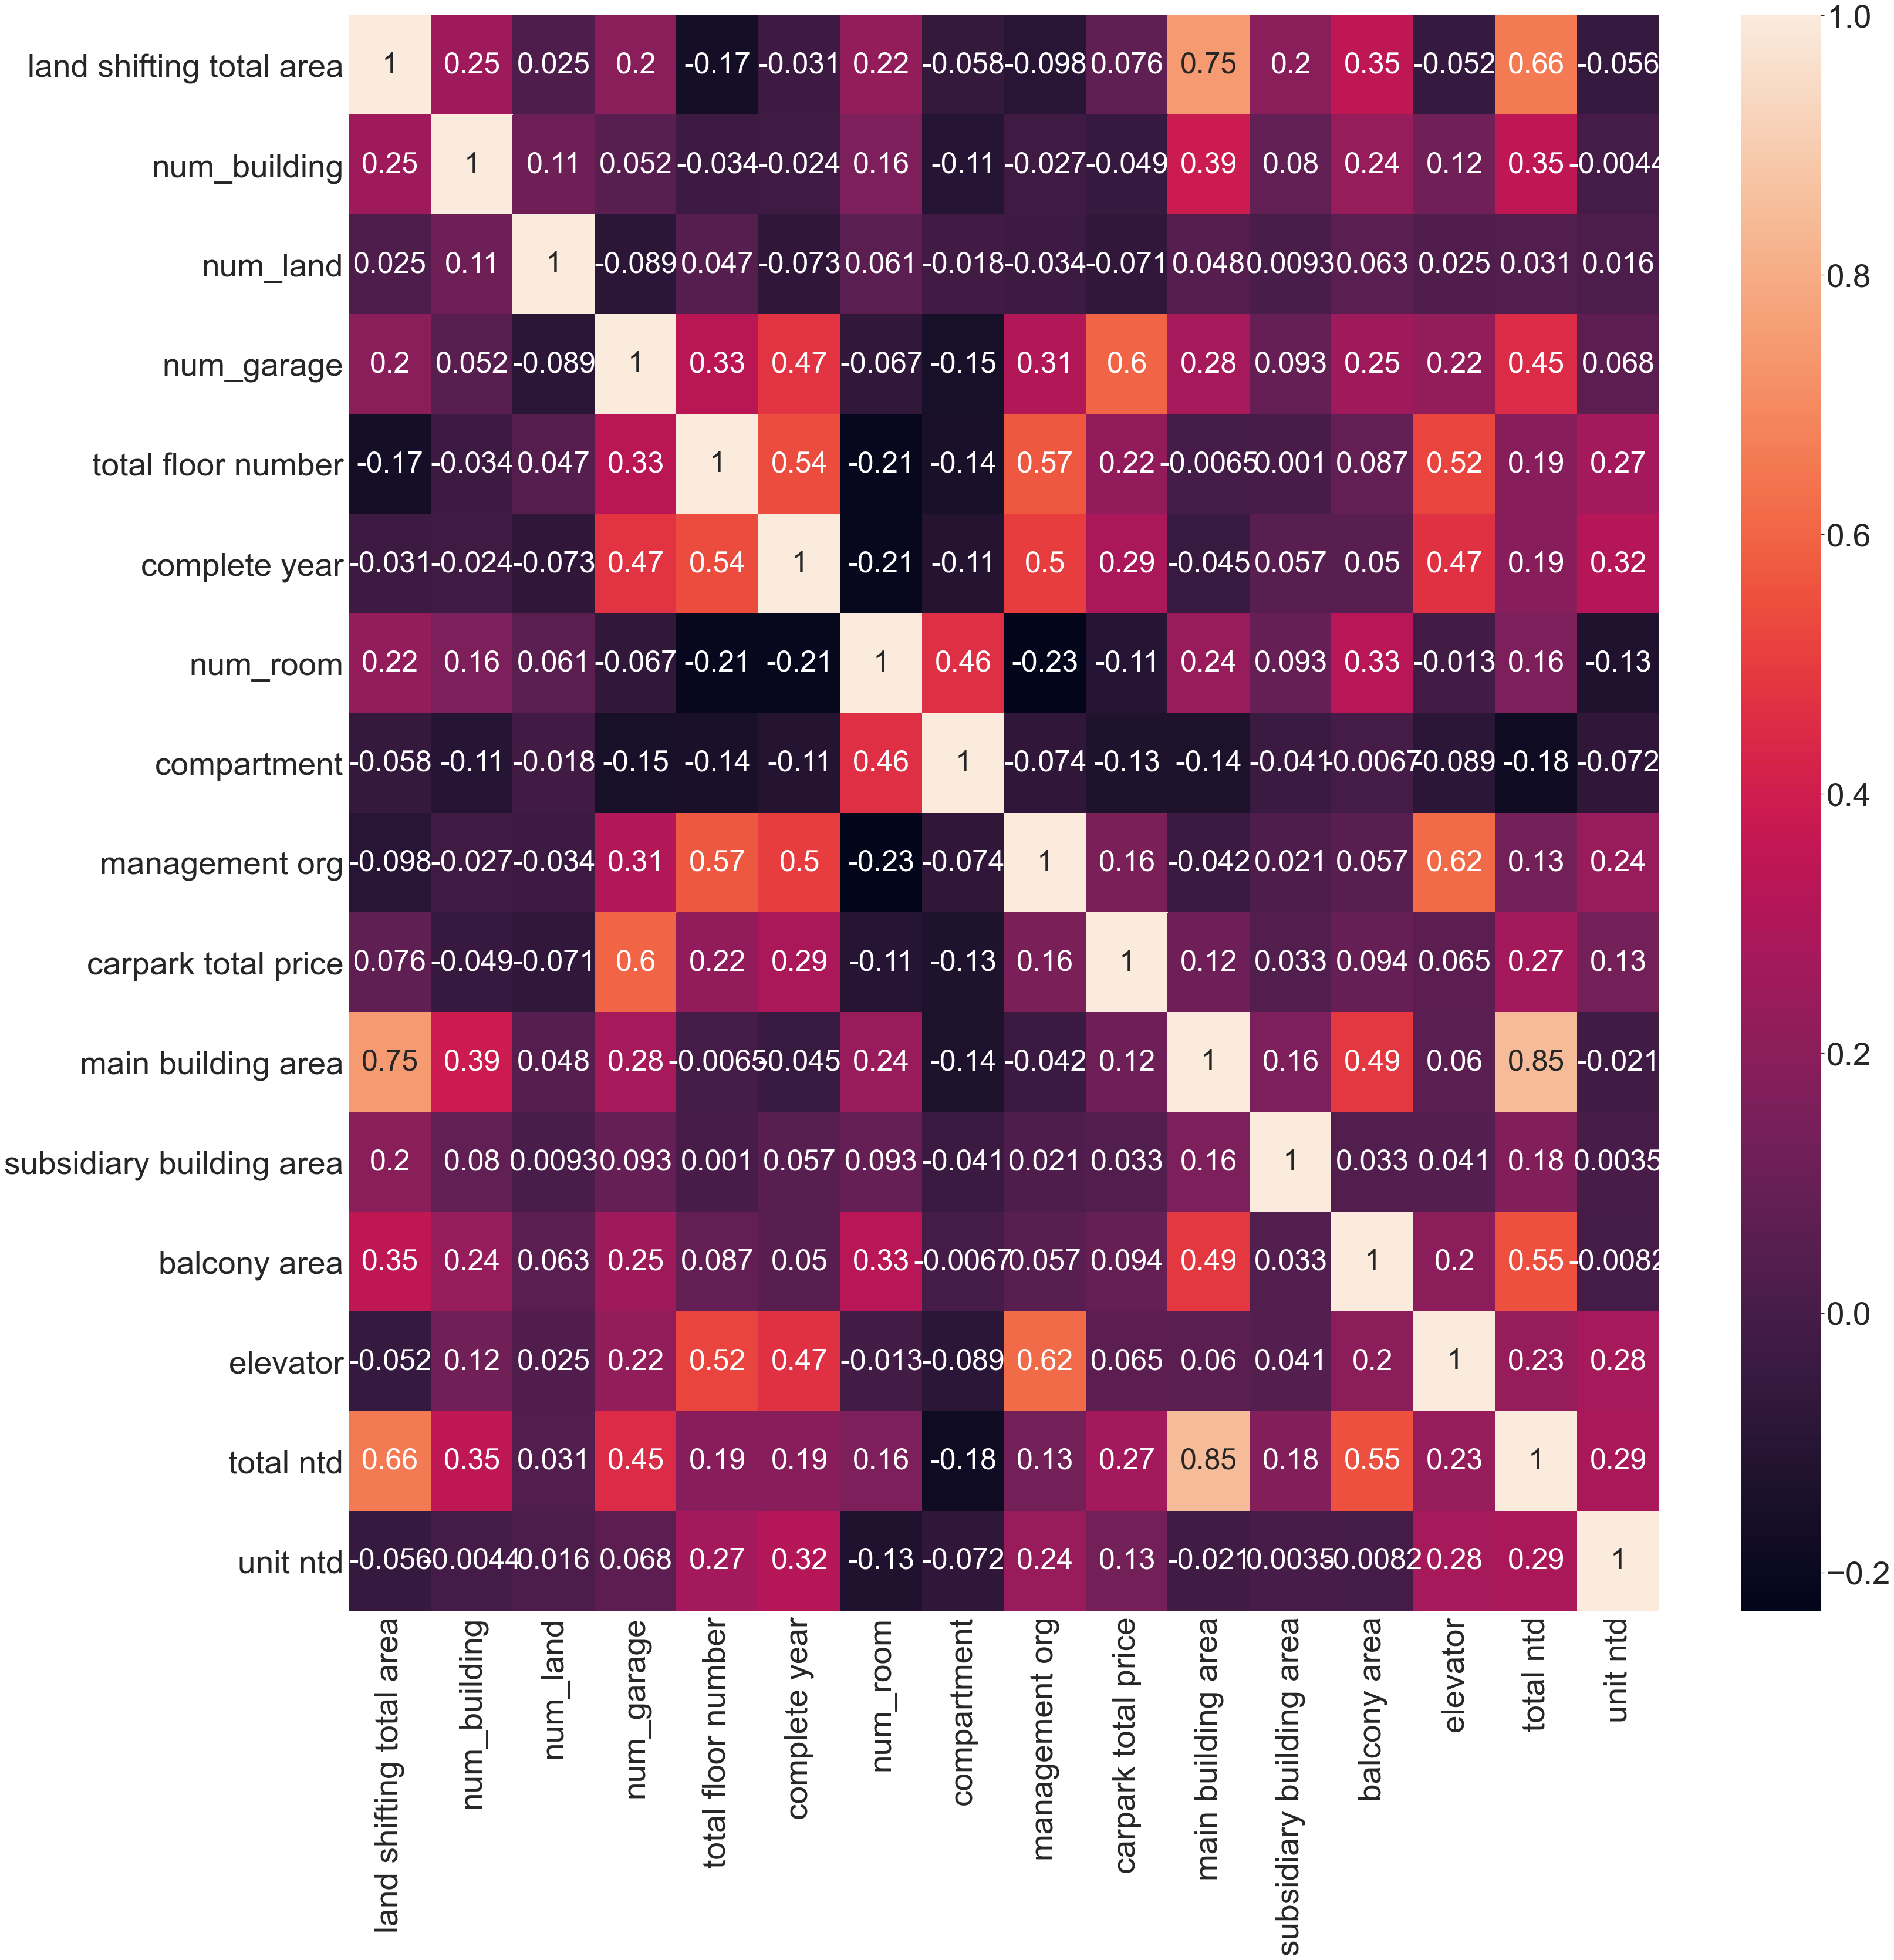

In [106]:
sns.set(font_scale=5)
plt.figure(figsize=(50,50))
sns.heatmap(data_updated.corr(), annot=True, annot_kws={'fontsize':50})

### Checking Continuous Data

In [38]:
data_updated.columns

Index(['district', 'land shifting total area', 'num_building', 'num_land',
       'num_garage', 'total floor number', 'complete year', 'num_room',
       'compartment', 'management org', 'carpark type', 'carpark total price',
       'main building area', 'subsidiary building area', 'balcony area',
       'elevator', 'total ntd', 'unit ntd'],
      dtype='object')

<AxesSubplot:xlabel='unit ntd', ylabel='total ntd'>

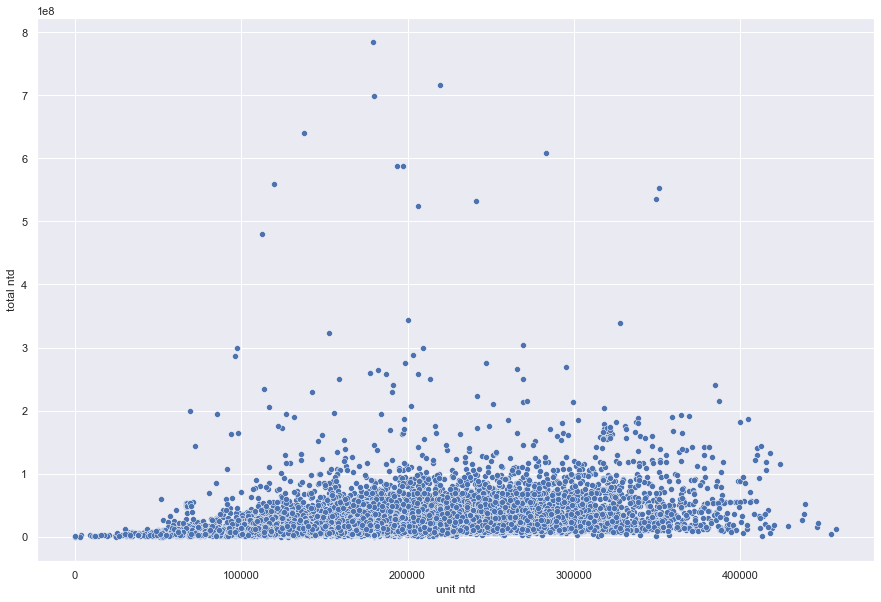

In [64]:
var = 'unit ntd'
y = 'total ntd'

plt.figure(figsize = (15,10))
sns.scatterplot(x=var, y=y, data=data_updated)

In [29]:
data_updated = data_updated[data_updated['balcony area'] < 250]

### Checking categorical data

<AxesSubplot:xlabel='elevator', ylabel='total ntd'>

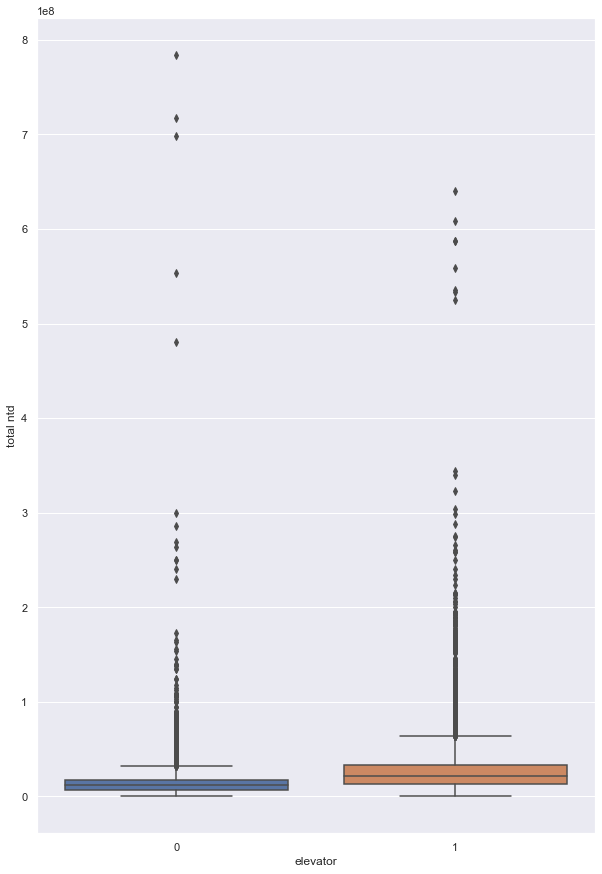

In [66]:
var = 'elevator'
y = 'total ntd'

plt.figure(figsize=(10,15))
sns.boxplot(x=var, y=y, data=data_updated)

<AxesSubplot:>

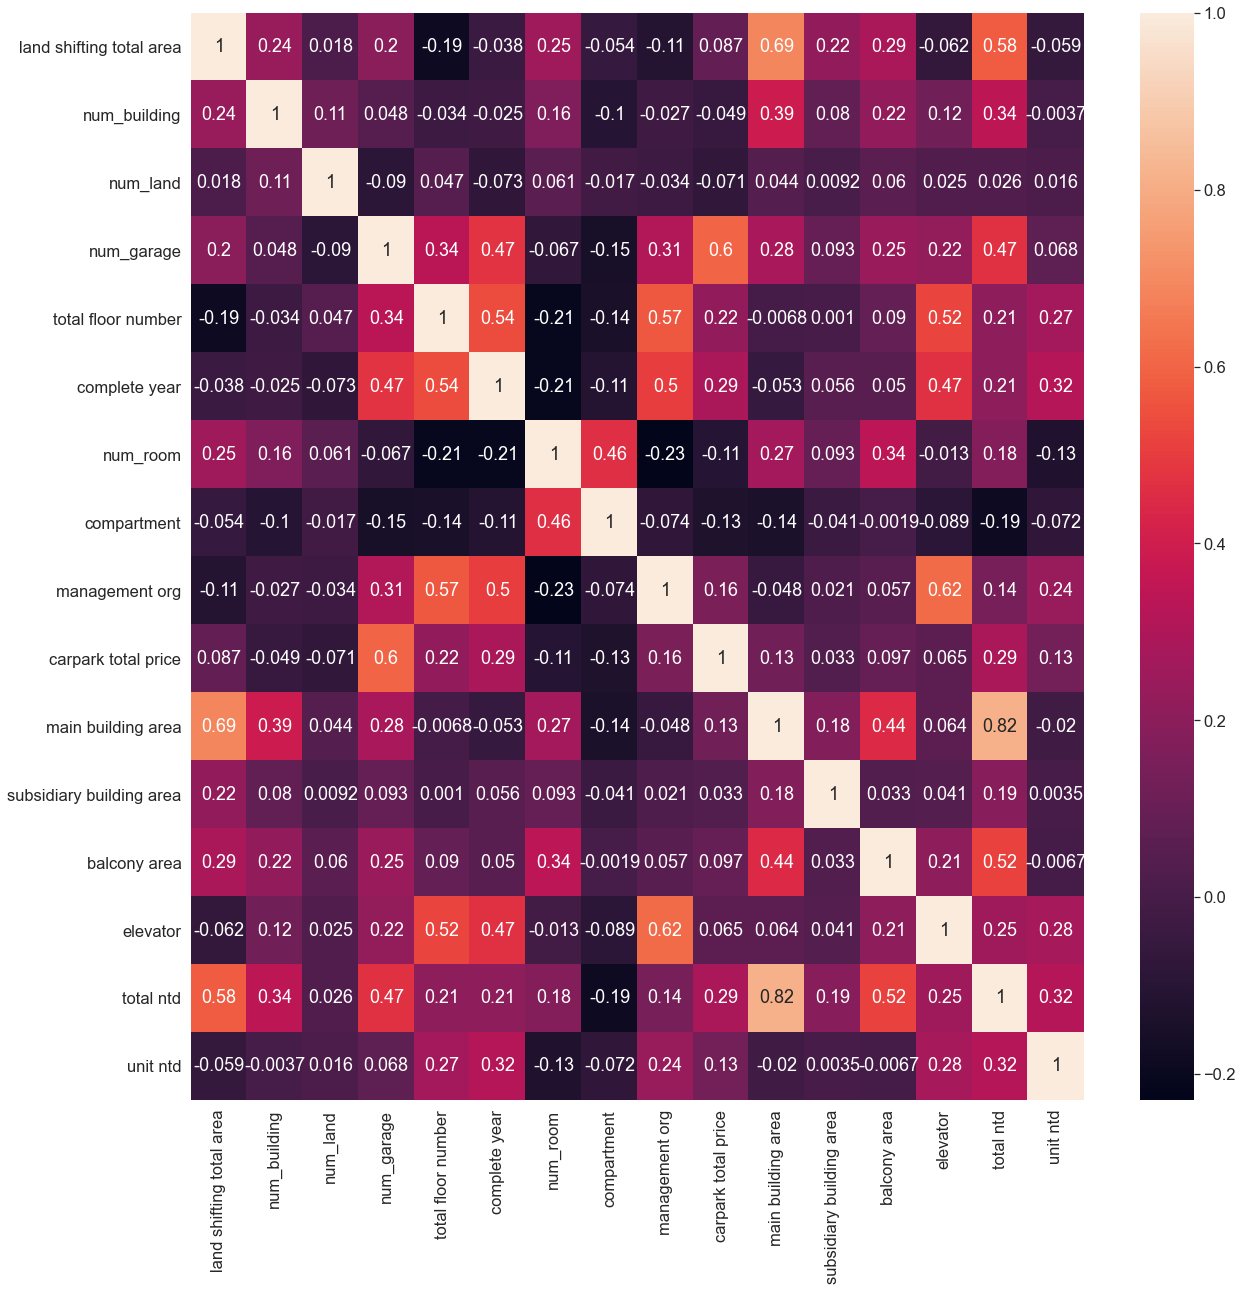

In [73]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.heatmap(data_updated.corr(), annot=True)

## Cheking assumptions

### Normality

C:\Users\B00330\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-100000000.0, 150000000.0)

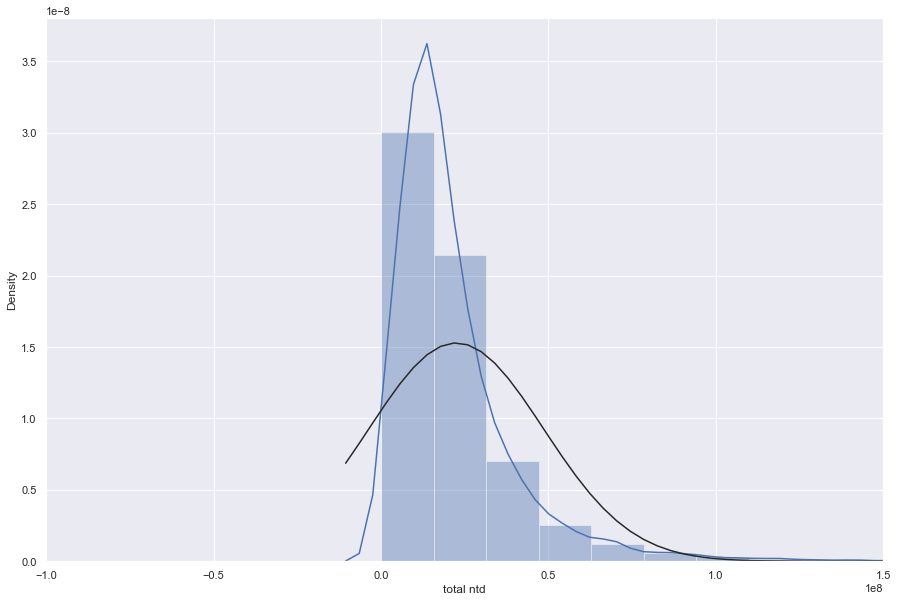

In [48]:
plt.figure(figsize=(15,10))
sns.distplot(data_updated['total ntd'], fit=norm)
plt.xlim(-1e8, 1.5e8)

Right-skewed. Apply log transformation to data

In [33]:
data_updated['total ntd'] = np.log(data_updated['total ntd'])

C:\Users\B00330\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total ntd', ylabel='Density'>

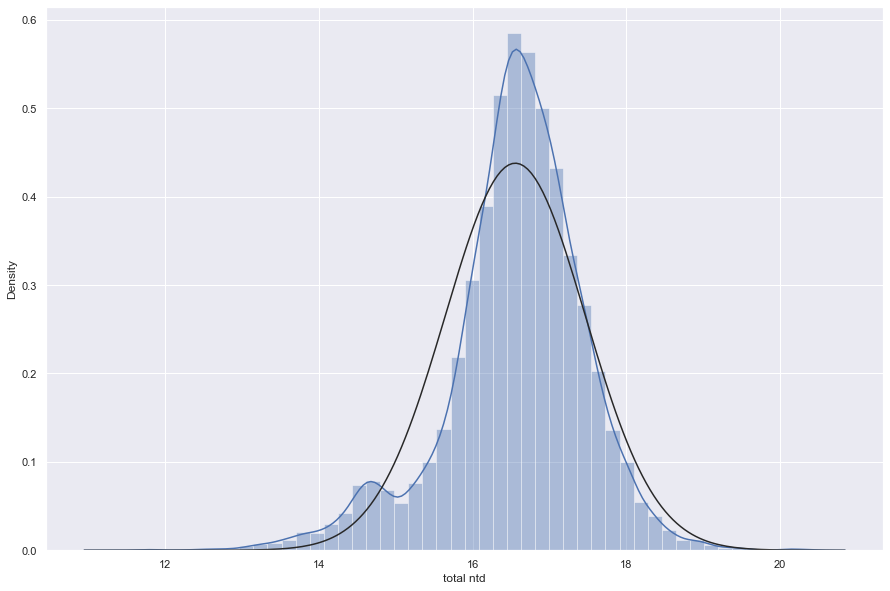

In [34]:
plt.figure(figsize=(15,10))
sns.distplot(data_updated['total ntd'], fit=norm)

### QQ plot

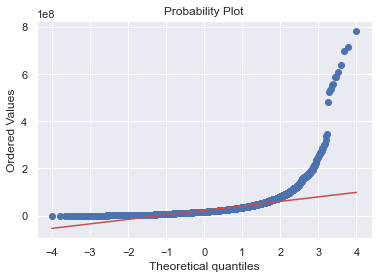

In [47]:
#before
# fig = plt.figure()
res = stats.probplot(data_updated['total ntd'], plot=plt)

((array([-4.00025559, -3.78519631, -3.66756381, ...,  3.66756381,
          3.78519631,  4.00025559]),
  array([11.31447453, 11.69524702, 11.70025944, ..., 20.36483936,
         20.39058733, 20.47998018])),
 (0.8955161526209463, 16.55681212509321, 0.9827974314559221))

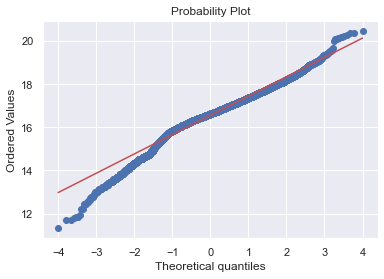

In [35]:
#after
stats.probplot(data_updated['total ntd'], plot=plt)

## Transforming categorical variables

In [30]:
data_updated = pd.get_dummies(data_updated)

In [31]:
data_updated.shape

(21909, 34)

In [34]:
data_updated.head()

land shifting total area  num_building  num_land  num_garage  \
0                     21.16             2         2           1   
1                     29.12             1         1           1   
2                     27.98             1         1           0   
3                      1.32             0         0           1   
4                     12.98             1         4           0   

   total floor number  complete year  num_room  compartment  management org  \
0                 7.0           69.0         3            1               1   
1                 9.0           94.0         4            1               1   
2                 5.0           72.0         3            1               0   
3                 9.0           84.0         0            1               1   
4                 7.0           66.0         1            1               1   

   carpark total price  ...  district_Wenshan District  \
0                    0  ...                          0   
1                    0  ...                          0   
2                    0  ...                          0   
3              1700000  ...                          0   
4                    0  ...                          0   

   district_Xinyi District  district_ZhongZheng District  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   district_Zhongshan District  carpark type_Ground Floor  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   carpark type_Lifting Machinery  carpark type_Lifting Plane  \
0                               0                           1   
1                               1                           0   
2                               0                           0   
3                               0                           1   
4                               0                           0   

   carpark type_No carpark  carpark type_Tower  carpark type_other  
0                        0                   0                   0  
1                        0                   0                   0  
2                        1                   0                   0  
3                        0                   0                   0  
4                        1                   0                   0  

[5 rows x 34 columns]

# Model Fitting

In [36]:
X = data_updated.drop('total ntd', axis=1)
y = data_updated['total ntd']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [38]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

## Ridge

In [51]:
ridge = Ridge()

In [52]:
ridge.fit(X_train, y_train)

C:\Users\B00330\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55558e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge()

In [53]:
r_pred = ridge.predict(X_test)

In [54]:
print(ridge.score(X_test, y_test))
print(mean_squared_error(y_test, r_pred))

0.6714283223166904
0.2731978998942205


## Lasso

In [55]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
l_pred = lasso.predict(X_test)

In [56]:
print(lasso.score(X_test, y_test))
print(mean_squared_error(y_test, l_pred))

0.5870599232484688
0.343347797187229


## XGBoost

In [41]:
xgb = XGBRegressor()

In [42]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [43]:
print(mean_squared_error(y_test, xgb_pred))
print(xgb.score(X_test, y_test))

0.018502903764932487
0.9777467903874422


# Find best model

In [39]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score

def find_best_model(X, y):
    algos = {
        'Ridge_regression': {'model': Ridge(),
                            'params': {'alpha': [1, 2]}},
        'Lasso_regression': {'model': Lasso(),
                            'params': {'alpha': [x/10 for x in range(1,2)], 
                                      'selection': ['random', 'cyclic']}},
        'XGB': {'model': XGBRegressor(),
               'params': {'n_estimators': [99,100]}},
        'Linear regression': {'model': LinearRegression(),
                             'params': {'normalize': [True, False]}}
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({'model': algo_name,
                      'best_score': gs.best_score_,
                      'best_params': gs.best_params_})
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [40]:
find_best_model(X_train, y_train)

C:\Users\B00330\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82569e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\B00330\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.4914e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\B00330\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80757e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\B00330\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05645e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\B00330\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22763e-17): result may not be accu

model  best_score                            best_params
0   Ridge_regression    0.709753                           {'alpha': 1}
1   Lasso_regression    0.633112  {'alpha': 0.1, 'selection': 'random'}
2                XGB    0.979019                  {'n_estimators': 100}
3  Linear regression    0.709757                   {'normalize': False}

In [44]:
import pickle
with open('taipei_house_price_model.pickle', 'wb') as f:
    pickle.dump(xgb, f)

In [45]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))